In [1]:
import pandas as pd
all_muts_df = pd.read_pickle("../data/4_10_with_uniq_midpts.pkl")
all_muts_df.shape

(3921, 48)

Should only look at correlations between mutation features with mutations from the same selection pressures. Relationships can change between mutated features with different selection pressures.

Though ultimatly only looking at genomic features, should consider all genomic features that are linked with any feature type (genomic feature, operon, pathway, etc) associated with selection pressure of interest.

In [7]:
muts_df = pd.DataFrame()
FEAT_TYPES = ["genomic features",
              "operons", "pathways", "regulators"
             ]  # ignoring genetic features for now since the genes get double with genomic features

for _, m in all_muts_df.iterrows():
    mut_assoc = False
    for ft in FEAT_TYPES:
        for f in m[ft]:
            if "isobutyric acid" in f["significantly associated conditions"]:
                mut_assoc = True
                break
        if mut_assoc:
            break
    
    if mut_assoc:
        muts_df = muts_df.append(m)

display(len(muts_df),muts_df.head())

81

,COG links,COGs,Details,EC number links,EC numbers,Mutation Type,Position,RBS,Reference Seq,Sequence Change,...,regulators,sample,sample type,strain-description,sulfur-source,supplement,taxonomy-id,tech_rep,temperature,terminator
1779,{'Cell wall/membrane/envelope biogenesis': ['E...,[{'name': 'Cell wall/membrane/envelope biogene...,IS5‑mediated,"{'3.4.13.18': ['ECK120014979', 'ECK120014979',...","[{'name': '3.4.13.18', 'significantly associat...",DEL,255591.0,{ECK120014270},NC_000913,"Δ18,364 bp",...,"[{'name': 'PhoB', 'significantly associated co...",1 50 2 1,clone,WT,MgSO4(0.24),isobutyric acid,511145,1.0,37 celsius,{ECK120034551}
1780,{'Carbohydrate transport and metabolism': ['EC...,[{'name': 'Carbohydrate transport and metaboli...,coding (58‑61/1413 nt),"{'2.7.1.40': ['ECK120014561', 'ECK120014561', ...","[{'name': '2.7.1.40', 'significantly associate...",MOB,1755755.0,{},NC_000913,IS5 (–) +4 bp,...,"[{'name': 'Cra', 'significantly associated con...",1 50 1 1,clone,WT,MgSO4(0.24),isobutyric acid,511145,1.0,37 celsius,{}
1781,{'Carbohydrate transport and metabolism': ['EC...,[{'name': 'Carbohydrate transport and metaboli...,E314Q (GAA→CAA),"{'2.7.1.40': ['ECK120014561', 'ECK120014561', ...","[{'name': '2.7.1.40', 'significantly associate...",SNP,1756637.0,{},NC_000913,G→C,...,"[{'name': 'Cra', 'significantly associated con...",1 50 2 1,clone,WT,MgSO4(0.24),isobutyric acid,511145,1.0,37 celsius,{}
1783,{'Signal transduction mechanisms': ['ECK125272...,[{'name': 'Signal transduction mechanisms'}],T274K (ACA→AAA),{},[],SNP,2037332.0,{},NC_000913,G→T,...,[],1 50 2 1,clone,WT,MgSO4(0.24),isobutyric acid,511145,1.0,37 celsius,{}
1785,{},[],intergenic (‑1/‑122),{},[],MOB,3327665.0,{},NC_000913,IS5 (+) +4 bp,...,[],1 50 2 1,clone,WT,MgSO4(0.24),isobutyric acid,511145,1.0,37 celsius,{}


In [8]:
# don't want to deal with giant deletions since their complicated networks are compounding mutation count issues. Annotated this within methods section
muts_df = muts_df[
    (muts_df["Sequence Change"] != "Δ18,364 bp")
    & (muts_df["Sequence Change"] != "Δ40,006 bp")
]
# muts_df = muts_df.drop([1997, 2134])

In [9]:
muts_df["sample"] = muts_df.apply(lambda r:
                                  r.exp
                                  + ' ' + str(int(r["ale"]))
                                  + ' ' + str(int(r["flask"]))
                                  + ' ' + str(int(r["isolate"]))
#                                   + ' ' + str(r["tech_rep"])  # commented these out since the mutations that are represented are those with highest freq across sample replications from the same flask, therefore there shouldn't be any mutation overlap between the sample replicates from the same flask.
                                          , axis=1
                                 )
muts_df.head()

,COG links,COGs,Details,EC number links,EC numbers,Mutation Type,Position,RBS,Reference Seq,Sequence Change,...,regulators,sample,sample type,strain-description,sulfur-source,supplement,taxonomy-id,tech_rep,temperature,terminator
1780,{'Carbohydrate transport and metabolism': ['EC...,[{'name': 'Carbohydrate transport and metaboli...,coding (58‑61/1413 nt),"{'2.7.1.40': ['ECK120014561', 'ECK120014561', ...","[{'name': '2.7.1.40', 'significantly associate...",MOB,1755755.0,{},NC_000913,IS5 (–) +4 bp,...,"[{'name': 'Cra', 'significantly associated con...",TOL_isobutyric_acid 1 50 1,clone,WT,MgSO4(0.24),isobutyric acid,511145,1.0,37 celsius,{}
1781,{'Carbohydrate transport and metabolism': ['EC...,[{'name': 'Carbohydrate transport and metaboli...,E314Q (GAA→CAA),"{'2.7.1.40': ['ECK120014561', 'ECK120014561', ...","[{'name': '2.7.1.40', 'significantly associate...",SNP,1756637.0,{},NC_000913,G→C,...,"[{'name': 'Cra', 'significantly associated con...",TOL_isobutyric_acid 1 50 2,clone,WT,MgSO4(0.24),isobutyric acid,511145,1.0,37 celsius,{}
1783,{'Signal transduction mechanisms': ['ECK125272...,[{'name': 'Signal transduction mechanisms'}],T274K (ACA→AAA),{},[],SNP,2037332.0,{},NC_000913,G→T,...,[],TOL_isobutyric_acid 1 50 2,clone,WT,MgSO4(0.24),isobutyric acid,511145,1.0,37 celsius,{}
1785,{},[],intergenic (‑1/‑122),{},[],MOB,3327665.0,{},NC_000913,IS5 (+) +4 bp,...,[],TOL_isobutyric_acid 1 50 2,clone,WT,MgSO4(0.24),isobutyric acid,511145,1.0,37 celsius,{}
1786,{'Transcription': ['ECK120016992']},[{'name': 'Transcription'}],E565A (GAA→GCA),"{'2.7.7.6': ['ECK120016992', 'ECK120016992']}","[{'name': '2.7.7.6', 'significantly associated...",SNP,4182938.0,{},NC_000913,A→C,...,[],TOL_isobutyric_acid 1 50 2,clone,WT,MgSO4(0.24),isobutyric acid,511145,1.0,37 celsius,{}


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display
import os, sys, itertools, csv
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from mutil.mut import get_clean_mut_gene_list

In [11]:
FEAT_TYPES = ["genomic features",
#               "operons", "pathways", "regulators"
             ]  # ignoring genetic features for now since the genes get double with genomic features

sample_feat_df = pd.DataFrame()
for _, m in muts_df.iterrows():
    mut_assoc = False
    for ft in FEAT_TYPES:
        for f in m[ft]:
            feat_name = f["name"]
            if ft == "operons":  # have to at least do operon since some operons have the same name as genes and will double-count
                feat_name += " operon"
            if ft == "pathways":
                feat_name += " pathway"
            if ft == "regulators":
                feat_name += " regulon"
            sample_feat_df = sample_feat_df.append({"sample": m["sample"], "mutated feature": feat_name}, ignore_index=True)

sample_feat_df.head()

,mutated feature,sample
0,pykF,TOL_isobutyric_acid 1 50 1
1,pykF,TOL_isobutyric_acid 1 50 2
2,hprS,TOL_isobutyric_acid 1 50 2
3,rlmE/yhbY,TOL_isobutyric_acid 1 50 2
4,rpoB,TOL_isobutyric_acid 1 50 2


In [12]:
cross_counts_df = pd.crosstab(
        sample_feat_df["mutated feature"], sample_feat_df["sample"]
    )
cross_counts_df = cross_counts_df.T  # correlation matrix needs the targets to be the columns
cross_counts_df.head()

mutated feature,allA,argE,asnA,bglGFB attenuator terminator,bglGFB terminator,caiC,chbB,dmsA,fumD/pykF,glnS,...,yfdY/lpxP,yffB,yffQR attenuator terminator,yffQp1,yffQp3,ygfI5',yijD,yjcE/yjcF,yjjG,yjjQ
sample,,,,,,,,,,,,,,,,,,,,,
TOL_isobutyric_acid 1 50 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TOL_isobutyric_acid 1 50 2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TOL_isobutyric_acid 2 50 1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
TOL_isobutyric_acid 2 50 2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TOL_isobutyric_acid 3 50 1,1,1,1,0,0,1,1,1,0,1,...,1,1,0,0,0,1,0,0,1,0


Get correlations between mutated features for features mutated in more than one sample (convergence).

In [13]:
df = cross_counts_df.copy()
df = df.T
df["sum"] = df.sum(axis=1)  # sum for each row
df = df[df["sum"] > 1]
df

sample,TOL_isobutyric_acid 1 50 1,TOL_isobutyric_acid 1 50 2,TOL_isobutyric_acid 2 50 1,TOL_isobutyric_acid 2 50 2,TOL_isobutyric_acid 3 50 1,TOL_isobutyric_acid 3 50 2,TOL_isobutyric_acid 4 50 1,TOL_isobutyric_acid 4 50 2,TOL_isobutyric_acid 4 50 3,TOL_isobutyric_acid 5 50 1,TOL_isobutyric_acid 5 50 2,TOL_isobutyric_acid 6 50 1,TOL_isobutyric_acid 6 50 2,TOL_isobutyric_acid 7 50 1,TOL_isobutyric_acid 7 50 2,TOL_isobutyric_acid 8 50 1,TOL_isobutyric_acid 8 50 3,sum
mutated feature,,,,,,,,,,,,,,,,,,
glyQ,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,2
hemA/prfA,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2
pykF,1,1,0,0,1,1,1,0,0,1,0,1,0,1,0,1,0,9
rpoB,1,1,0,0,1,1,1,0,0,1,0,1,0,1,0,0,0,8
rpoC,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,3
rpoS,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,3
rpsC,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [14]:
corr_df = cross_counts_df.corr()
corr_df.head()

mutated feature,allA,argE,asnA,bglGFB attenuator terminator,bglGFB terminator,caiC,chbB,dmsA,fumD/pykF,glnS,...,yfdY/lpxP,yffB,yffQR attenuator terminator,yffQp1,yffQp3,ygfI5',yijD,yjcE/yjcF,yjjG,yjjQ
mutated feature,,,,,,,,,,,,,,,,,,,,,
allA,1.0000,1.0000,1.0000,-0.0625,-0.0625,1.0000,1.0000,1.0000,-0.0625,1.0000,...,1.0000,1.0000,-0.0625,-0.0625,-0.0625,1.0000,-0.0625,-0.0625,1.0000,-0.0625
argE,1.0000,1.0000,1.0000,-0.0625,-0.0625,1.0000,1.0000,1.0000,-0.0625,1.0000,...,1.0000,1.0000,-0.0625,-0.0625,-0.0625,1.0000,-0.0625,-0.0625,1.0000,-0.0625
asnA,1.0000,1.0000,1.0000,-0.0625,-0.0625,1.0000,1.0000,1.0000,-0.0625,1.0000,...,1.0000,1.0000,-0.0625,-0.0625,-0.0625,1.0000,-0.0625,-0.0625,1.0000,-0.0625
bglGFB attenuator terminator,-0.0625,-0.0625,-0.0625,1.0000,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,...,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625
bglGFB terminator,-0.0625,-0.0625,-0.0625,-0.0625,1.0000,-0.0625,-0.0625,-0.0625,1.0000,-0.0625,...,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,-0.0625,1.0000,-0.0625,-0.0625,-0.0625


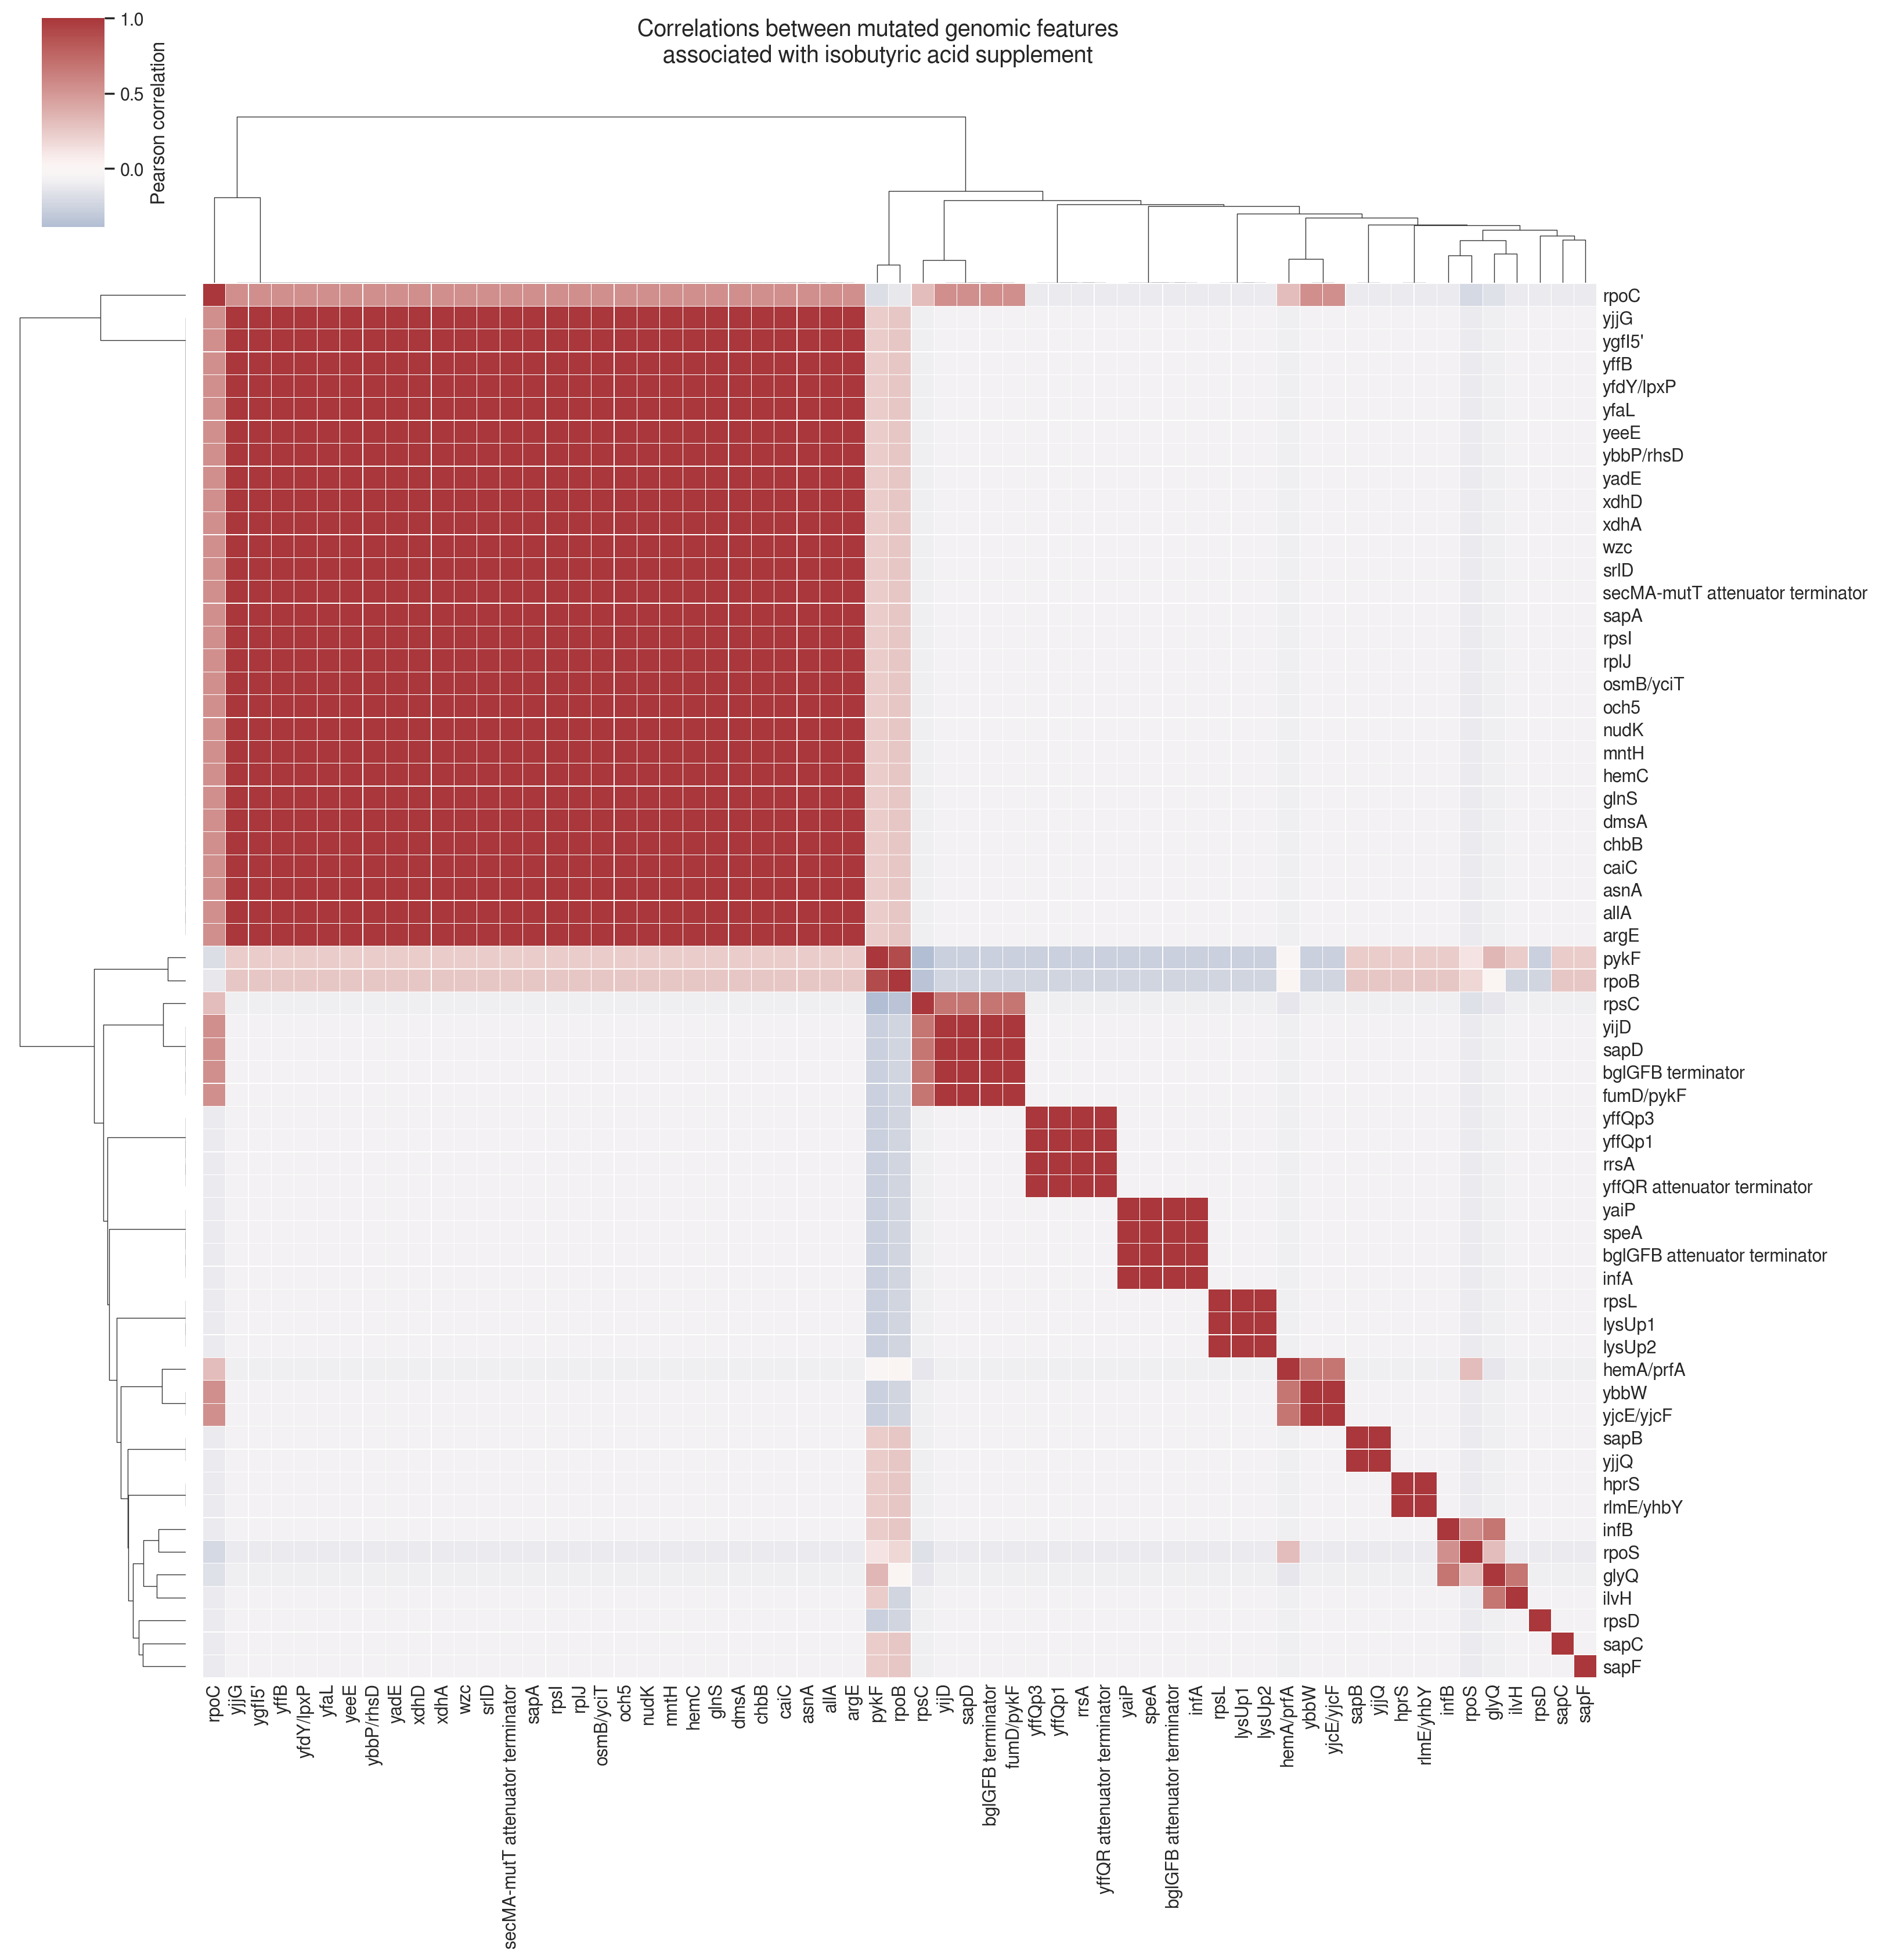

In [18]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.sans-serif'] = ["FreeSans"]
sns.set_context("paper")
sns.set_style("white")
sns.set(font="FreeSans")


cm = sns.clustermap(
    corr_df,
    linewidths=0.1,
#     xticklabels=False,
#     yticklabels=False,
    figsize=(18,18),
    center=0,
    cmap="vlag",
    cbar_pos=(0.1, 0.85, 0.03, 0.10),
    cbar_kws={'label': 'Pearson correlation'}
)
# Fix for recent matplotlib/seaborn issue
cm.ax_heatmap.set_ylim(len(corr_df.T)+0, -0)

cm.ax_heatmap.tick_params(axis='both', which='both', length=0)
# cm.ax_heatmap.set_title("Correlations between mutated genomic features\nassociated with glycerol as a carbon source")
cm.fig.suptitle('Correlations between mutated genomic features\nassociated with isobutyric acid supplement', y=0.95) 
# cm.fig.suptitle('Mutations to pykF and rpoB are positively correlated\nwhile both negatively correlated with rpoC', y=1.05) 
# cm.cax.set_visible(False)
ax = cm.ax_heatmap
ax.set_ylabel("")
ax.set_xlabel("")

# H = 1
# W = 1
y0_offset = 0
hm = cm.ax_heatmap.get_position()
# plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(),fontsize=6)
# plt.setp(cm.ax_heatmap.xaxis.get_majorticklabels(),fontsize=6)
col_dendo = cm.ax_col_dendrogram.get_position()
cm.ax_col_dendrogram.set_position([
    col_dendo.x0,
    col_dendo.y0,
    col_dendo.width,
    col_dendo.height*0.5
])
row_dendo = cm.ax_row_dendrogram.get_position()
cm.ax_row_dendrogram.set_position([
    row_dendo.x0 + 0.0755,
    row_dendo.y0 + y0_offset,
    row_dendo.width*0.5,
    row_dendo.height
])
# cm.ax_heatmap.set_position([
#     hm.x0,
#     hm.y0 + y0_offset,
#     hm.width*W,
#     hm.height*H
# ])
plt.savefig("../figs/sf30.svg", format="svg")

In [16]:
# import seaborn as sns
# import matplotlib
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.rcParams["figure.dpi"] = 300
# plt.rcParams['font.sans-serif'] = ["FreeSans"]
# sns.set_context("paper")
# sns.set_style("white")
# sns.set(font="FreeSans")


# cm = sns.clustermap(
#     corr_df,
#     linewidths=0.1,
# #     xticklabels=False,
# #     yticklabels=False,
# #     figsize=(27,27),  # For when including all feature types
#     figsize=(16,16),
#     center=0,
#     cmap="vlag",
#     cbar_pos=(0, 0.85, 0.03, 0.15),
#     cbar_kws={'label': 'Pearson correlation'}
# )
# # Fix for recent matplotlib/seaborn issue
# cm.ax_heatmap.set_ylim(len(corr_df.T)+0, -0)

# cm.ax_heatmap.tick_params(axis='both', which='both', length=0)
# # cm.ax_heatmap.set_title("Log odds between regulons and conditions")
# # cm.fig.suptitle('Mutations to pykF or upstream fumD/pykF\nare positively correlated to rpoB or rpoC', y=1.05)
# # cm.cax.set_visible(False)